# **Cohort Analysis on Customer Sales Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries and data load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Dataset/online_retail_dataset.csv', dtype={'CustomerID':str}, parse_dates=['InvoiceDate'])
df = dataset.copy()

### Data pre-processing

Derived 'Sales' column from quantity sold and unit price of each item

In [4]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   Sales        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.081158,NaN,96.759853,378.810824


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Correlation between numerical variables of the dataset

<Axes: >

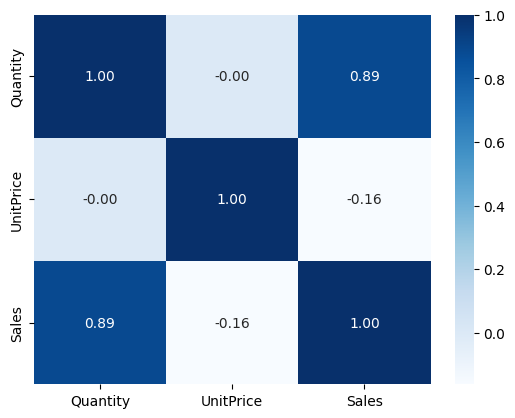

In [8]:
ax = df.corr(numeric_only=True)
sns.heatmap(data=ax, cmap='Blues', fmt='.2f', annot=True)

Derive first day of the month as **'Bill Month'** from **'Invoice Date'** column

In [9]:
def first_day_of_month(x):
  return dt.datetime(month=x.month, year=x.year, day=1)

In [10]:
df['BillMonth'] = df['InvoiceDate'].apply(first_day_of_month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,BillMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


Derive **'Total Sales'** amount from each month

In [11]:
df_revenue_by_month = df.groupby('BillMonth')['Sales'].sum().reset_index(name='TotalSales')
df_revenue_by_month

,BillMonth,TotalSales
0,2010-12-01,748957.020
1,2011-01-01,560000.260
2,2011-02-01,498062.650
3,2011-03-01,683267.080
4,2011-04-01,493207.121
5,2011-05-01,723333.510
6,2011-06-01,691123.120
7,2011-07-01,681300.111
8,2011-08-01,682680.510
9,2011-09-01,1019687.622


### Data Visualization

Plot an interactive line chart of Monthly Sales from Total Sales amount on each Month

In [12]:
import plotly.graph_objects as go
import plotly.express as exp
import plotly.io as pio
pio.templates.default = 'plotly_white'

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_revenue_by_month['BillMonth'], y=df_revenue_by_month['TotalSales'], mode='lines+markers', name='Month-wise Sales'))
fig.update_layout(
    title = {
        'text':'<b>Monthly Sales</b>',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title = 'Billing Month',
    yaxis_title = 'Total Sales'
)
fig.show()

### Cohort Analysis with Python

Derive Cohort Month from first purchase (Bill Month) of each Customer

In [13]:
df['CohortMonth'] =  df.groupby('CustomerID')['BillMonth'].transform('min')

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,BillMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


Derive **'Month Index'** from the difference in Each Bill Month to first Bill Month (Cohort Month):

Month Index is calculated based on Year and Month difference:
Month Index = (difference in Year) * 12 + (difference in Month) + 1

[Adding +1 at the end to keep the first month index at 1]

In [15]:
bill_year_val, bill_month_val = df['BillMonth'].dt.year, df['BillMonth'].dt.month
cohort_year_val, cohort_month_val = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [16]:
diff_year = bill_year_val - cohort_year_val
diff_month = bill_month_val - cohort_month_val

In [17]:
df['MonthIndex'] =  diff_year * 12 + diff_month + 1

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,BillMonth,CohortMonth,MonthIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0


Derive 'Retention' based on Cohort Month against Month Index

In [19]:
g = df.groupby(['CohortMonth','MonthIndex'])

In [20]:
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index='CohortMonth',columns='MonthIndex',values='CustomerID')
cohortSizes = cohortCounts.iloc[:,0]
retention = cohortCounts.divide(cohortSizes,axis=0)*100

In [21]:
retention = retention.round(2)
retention

MonthIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot an heatmap chart of Retention by Cohort Months over Month Index

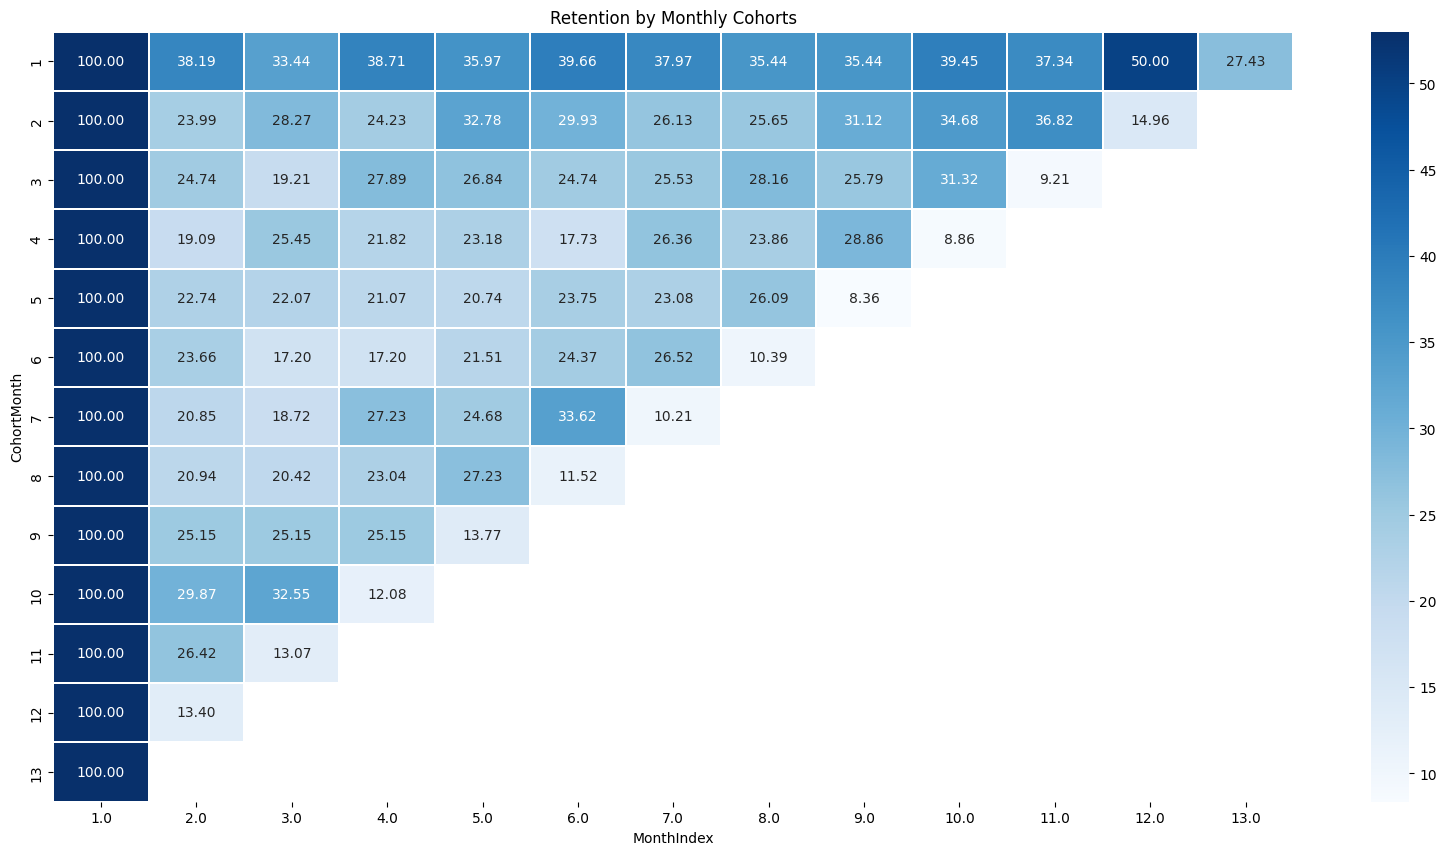

In [22]:
month_list = [str(i) for i in range(1,len(retention)+1)]
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention, annot = True, cmap = "Blues", vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '.2f', linewidth = 0.3, yticklabels=month_list)
plt.show()